## Stroke Prediction


#### Our top priority in this health problem is to identify patients with a stroke.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

<b>Attribute Information</b>


1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>

### Import libraries

In [124]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline #explore about it more
plt.rcParams['figure.figsize']=(5,5)


UsageError: unrecognized arguments: #explore about it more


In [125]:
stroke_df=pd.read_csv(r"C:\Users\yoges\Desktop\Project\Stroke Prediction\healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Exploratory data Analysis

In [126]:
stroke_df.shape

(5110, 12)

In [127]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [128]:
#to find null value in database
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Lets fill null values

In [129]:
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [130]:
#we are counting values frequency which are occuring in data set and we have option to fill null values with these most occuring values or with mean values.
stroke_df[ 'bmi'].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
48.0     1
49.4     1
47.4     1
46.6     1
54.0     1
Name: bmi, Length: 418, dtype: int64

In [131]:
#lets see the statistics of data bmi
stroke_df[ 'bmi'].describe()


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [132]:
# we see on an average everyone having 28.89 we will fill it wiht mean
stroke_df[ 'bmi'].fillna(stroke_df[ 'bmi'].mean(),inplace=True) #inplace used for permanent filling values


In [133]:
stroke_df[ 'bmi'].describe()
#nothing will change except filling the null values in data


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [134]:
stroke_df.isnull().sum()
#now there is no null values in the dataset

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [135]:

stroke_df.drop('id',axis=1,inplace=True)

In [136]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Outliers Removal

In [137]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(8,6),dpi=800,facecolor='w',edgecolor='k')


<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

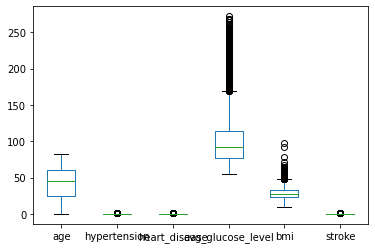

In [138]:
stroke_df.plot(kind='box')
plt.show()

In [139]:
#lets first see the statistics of data average glucose level
stroke_df[ 'avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [140]:
#lets find how much are greater than 114.09000 so we will have clear idea if we delete them what will happen.
stroke_df[stroke_df['avg_glucose_level']>114.090000]
#as showing below they are about 1277 if we will delete them then 20% of our data will be delted from data set which is not good for us.
#so we are going to keep outliers in our data set

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.8,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.8,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [141]:
stroke_df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [142]:

#here one column have more than two category so we will use here label encoding.
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [144]:
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
residence_type=enc.fit_transform(data['Residence_type'])
work_type=enc.fit_transform(data['work_type'])
ever_married=enc.fit_transform(data['ever_married'])


In [145]:
data['gender']=gender
data['smoking_status']=smoking_status
data['Residence_type']=residence_type
data['work_type']=work_type
data['ever_married']=ever_married

In [146]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,475,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,476,2,0
5106,0,102,0,0,1,3,1,3030,273,2,0
5107,0,56,0,0,1,3,0,1314,179,2,0
5108,1,72,0,0,1,2,0,3363,129,1,0


In [147]:
X=stroke.drop('stroke',axis=1)
y=stroke['stroke']
#we can use k fold cross validation here 

In [148]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [149]:
X_std=std.fit_transform(X) 

### Model Training

#### 1.KNN

In [150]:
#scoring roc_auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143]}


kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

knn = KNeighborsClassifier()

cv=GridSearchCV(estimator=knn,param_grid=params,scoring='roc_auc',cv=kfold)

cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             scoring='roc_auc')

In [151]:
print(cv.best_params_)

{'n_neighbors': 87}


In [152]:
ac_knn=cv.best_score_

In [153]:
_
print(cv.best_score_)

0.8129696161438197


In [154]:
print(cv.best_estimator_)

KNeighborsClassifier(n_neighbors=87)


In [155]:
#RESULT
# print(cv.best_params_) {'n_neighbors': 125}
#(cv.best_score_) 0.7951508017643762

In [156]:
#scoring f1_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143]}


kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

knn = KNeighborsClassifier()

cv=GridSearchCV(estimator=knn,param_grid=params,scoring='f1_weighted',cv=kfold)

cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             scoring='f1_weighted')

In [157]:
print(cv.best_params_)

{'n_neighbors': 5}


In [158]:
f1_knn=cv.best_score_
print(cv.best_score_)

0.9288020242358209


In [159]:
print(cv.best_estimator_)

KNeighborsClassifier()


##### Randomized Search

In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_neighbors': np.arange(1,1000)}


knn = KNeighborsRegressor()

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5 , random_state=2022,shuffle=True)

rcv = RandomizedSearchCV(knn, param_distributions=parameters,cv=kfold,scoring='roc_auc',n_iter=20,random_state = 2022,verbose=3)
rcv.fit( X_std , y )

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=153 .................................................
[CV] ..................... n_neighbors=153, score=0.811, total=   0.1s
[CV] n_neighbors=153 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... n_neighbors=153, score=0.807, total=   0.1s
[CV] n_neighbors=153 .................................................
[CV] ..................... n_neighbors=153, score=0.838, total=   0.1s
[CV] n_neighbors=153 .................................................
[CV] ..................... n_neighbors=153, score=0.828, total=   0.1s
[CV] n_neighbors=153 .................................................
[CV] ..................... n_neighbors=153, score=0.803, total=   0.1s
[CV] n_neighbors=527 .................................................
[CV] ..................... n_neighbors=527, score=0.802, total=   0.2s
[CV] n_neighbors=527 .................................................
[CV] ..................... n_neighbors=527, score=0.818, total=   0.2s
[CV] n_neighbors=527 .................................................
[CV] ..................... n_neighbors=527, score=0.834, total=   0.2s
[CV] n_neighbors=527 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.5s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
                   estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])}

In [161]:
print(rcv.best_params_)

{'n_neighbors': 520}


In [162]:
print(rcv.best_score_)

0.8215999791724228


In [163]:
df_rnd = pd.DataFrame(rcv.cv_results_)

In [164]:
print(rcv.best_estimator_)

KNeighborsRegressor(n_neighbors=520)


In [165]:
#RESULT
# (rcv.best_params_) {'n_neighbors': 520}
#(rcv.best_score_) 0.8220904507326672

### 2.Logistic regression using

In [166]:
#scoring roc_auc_ovr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

params={'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

log_reg=LogisticRegression(random_state=2022)
kfold=StratifiedKFold(shuffle=True,n_splits=5,random_state=2022)
#scoring score for roc_auc is roc_auc_ovr
cv=GridSearchCV(log_reg,param_grid=params,cv=kfold,scoring='roc_auc_ovr')

cv.fit(X_std, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=LogisticRegression(random_state=2022),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc_ovr')

In [167]:
print(cv.best_params_)


{'solver': 'newton-cg'}


In [168]:
ac_lr=cv.best_score_

In [169]:
print(cv.best_score_)

0.8461128940277213


In [170]:
#RESULTS
#(cv.best_params_) {'solver': 'liblinear'}
#(cv.best_score_) 0.8389185352290459


In [171]:
#scoring f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

params={'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

log_reg=LogisticRegression(random_state=2022)
kfold=StratifiedKFold(shuffle=True,n_splits=5,random_state=2022)
#scoring score for roc_auc is roc_auc_ovr
cv=GridSearchCV(log_reg,param_grid=params,cv=kfold,scoring='f1_weighted')

cv.fit(X_std, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=LogisticRegression(random_state=2022),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_weighted')

In [172]:
print(cv.best_params_)


{'solver': 'liblinear'}


In [173]:
f1_lr=cv.best_score_
print(cv.best_score_)

0.9282742517000422


In [174]:
print(cv.best_estimator_)

LogisticRegression(random_state=2022, solver='liblinear')


### 3.SVM

##### a. Linear

In [175]:
#scoring roc_auc
from sklearn.svm import SVC
svm = SVC(random_state=2022,kernel='linear',probability=True)
params = {'C':[0.001,0.01,0.1,0.5,0.7,1,1.4,2]}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(svm, param_grid=params,scoring='roc_auc',cv=kfold)
cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(kernel='linear', probability=True,
                           random_state=2022),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.4, 2]},
             scoring='roc_auc')

In [176]:
print(cv.best_params_)

{'C': 0.01}


In [177]:
ac_svm=cv.best_score_

In [178]:
print(cv.best_score_)

0.6737194768534595


In [179]:
#RESULT
#(cv.best_params_) {'solver': 'liblinear'}
#(cv.best_score_) 0.8389185352290459

In [180]:
#scoring f1_score
from sklearn.svm import SVC
svm = SVC(random_state=2022,kernel='linear',probability=True)
params = {'C':[0.001,0.01,0.1,0.5,0.7,1,1.4,2]}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(svm, param_grid=params,scoring='f1_weighted',cv=kfold)
cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(kernel='linear', probability=True,
                           random_state=2022),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.4, 2]},
             scoring='f1_weighted')

In [181]:
print(cv.best_params_)

{'C': 0.001}


In [182]:
print(cv.best_score_)

0.9275164925545338


#### b.Radial

In [183]:
#scoring roc_auc
svm = SVC(random_state=2022,kernel='rbf',probability=True)
params = {'C':[0.001,0.01,0.1,0.5,0.7,1,1.4,2],'gamma':['scale','auto',0.01,0.1,0.5,1,2]}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(svm, param_grid=params,scoring='roc_auc',cv=kfold)
cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(probability=True, random_state=2022),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.4, 2],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1, 2]},
             scoring='roc_auc')

In [184]:
print(cv.best_params_)

{'C': 0.001, 'gamma': 0.01}


In [185]:
print(cv.best_score_)

0.7528852897381911


In [186]:
#RESULT
#(cv.best_params_) {'C': 0.001, 'gamma': 0.01}
#(cv.best_score_) 0.6756626307635459

In [187]:
#scoring f1_score
svm = SVC(random_state=2022,kernel='rbf',probability=True)
params = {'C':[0.001,0.01,0.1,0.5,0.7,1,1.4,2],'gamma':['scale','auto',0.01,0.1,0.5,1,2]}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(svm, param_grid=params,scoring='f1_weighted',cv=kfold)
cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(probability=True, random_state=2022),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.4, 2],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1, 2]},
             scoring='f1_weighted')

In [188]:
print(cv.best_params_)

{'C': 2, 'gamma': 'scale'}


In [189]:
f1_svm=cv.best_score_
print(cv.best_score_)

0.9284141549424456


#### c.Polynomial

In [190]:
#scoring roc_auc
svm = SVC(random_state=2022,kernel='poly',probability=True)
params = {'C':[0.001,0.01,0.1,0.5,0.7,1,1.4,2],'coef0':[0,0.5,1,2],'degree':[2,3]}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(svm, param_grid=params,scoring='roc_auc',cv=kfold)
cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(kernel='poly', probability=True, random_state=2022),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.4, 2],
                         'coef0': [0, 0.5, 1, 2], 'degree': [2, 3]},
             scoring='roc_auc')

In [191]:
print(cv.best_params_)

{'C': 0.7, 'coef0': 2, 'degree': 3}


In [192]:
print(cv.best_score_)

0.6885238510411841


In [193]:
#RESULT
#(cv.best_params_) {'C': 2, 'coef0': 1, 'degree': 2}
#(cv.best_score_) 0.6741999472444504

In [194]:
#scoring f1_score
svm = SVC(random_state=2022,kernel='poly',probability=True)
params = {'C':[0.001,0.01,0.1,0.5,0.7,1,1.4,2],'coef0':[0,0.5,1,2],'degree':[2,3]}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(svm, param_grid=params,scoring='f1_weighted',cv=kfold)
cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(kernel='poly', probability=True, random_state=2022),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.4, 2],
                         'coef0': [0, 0.5, 1, 2], 'degree': [2, 3]},
             scoring='f1_weighted')

In [195]:
print(cv.best_params_)

{'C': 2, 'coef0': 2, 'degree': 3}


In [196]:
print(cv.best_score_)

0.9342193075969615


### 4. Random Forest

In [197]:
#scoring roc_auc
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=2022)
params= {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3,4],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [50,100, 200, 300]}

kfold = KFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(model_rf,param_grid=params,cv=kfold,scoring="roc_auc",n_jobs=-1)

cv.fit(X_std,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(random_state=2022), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='roc_auc')

In [198]:
print(cv.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [199]:
ac_rf=cv.best_score_

In [200]:
print(cv.best_score_)

0.8347387855222695


In [201]:
best_model = cv.best_estimator_

In [202]:
best_model.feature_importances_

array([0.02424016, 0.30380679, 0.03270178, 0.03167835, 0.02067015,
       0.0423758 , 0.02604667, 0.22802631, 0.234452  , 0.056002  ])

In [203]:
import matplotlib.pyplot as plt

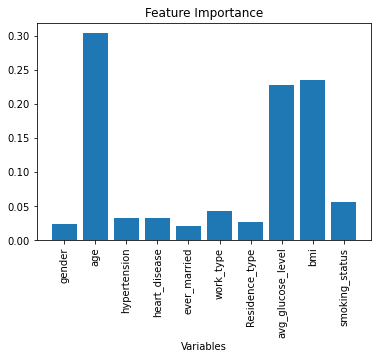

In [204]:
ind = np.arange(X.shape[1])
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=90)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()

In [205]:
#RESULT
#(cv.best_score_) 0.8319325906395102

In [206]:
#scoring f1_score
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=2022)
params= {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3,4],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [50,100, 200, 300]}

kfold = KFold(n_splits=5,shuffle=True,random_state=2022)

cv = GridSearchCV(model_rf,param_grid=params,cv=kfold,scoring='f1_weighted',n_jobs=-1)

cv.fit(X_std,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(random_state=2022), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1_weighted')

In [207]:
f1_rf=cv.best_params_
print(cv.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 50}


In [208]:
f1_rf=cv.best_score_

In [209]:
print(cv.best_score_)

0.9294676469799145


In [210]:
best_model = cv.best_estimator_

In [211]:
best_model.feature_importances_

array([0.02370569, 0.30010099, 0.02899449, 0.03007847, 0.01628124,
       0.03464726, 0.01999731, 0.24401073, 0.2469195 , 0.05526431])

### 5. Decision Tree

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3,random_state=2022,stratify=y)

clf = DecisionTreeClassifier(max_depth=3,random_state=2022) 

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:,1]


In [213]:
#confusion matrix
print(f"Confusion Maxtrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Maxtrix:
 [[1454    4]
 [  74    1]]


In [214]:
#classification_report
print(f"Classification_report:\n {classification_report(y_test, y_pred)}")

Classification_report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.20      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.58      0.51      0.50      1533
weighted avg       0.91      0.95      0.93      1533



In [215]:
#f1_score

print(f"F1 score:\n {f1_score(y_test, y_pred)}")

F1 score:
 0.025


In [216]:
print(f"Accuracy Score:\n {accuracy_score(y_test,y_pred)}")

Accuracy Score:
 0.949119373776908


In [217]:
#RESULT
#F1 score: 0.04255319148936171

#Accuracy Score: 0.949119373776908


#### GridSearch

In [218]:
#scoring roc auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,min_samples_split=minsplit_range,min_samples_leaf=minleaf_range)

kfold = StratifiedKFold(n_splits=5, random_state=2022,shuffle=True)

clf = DecisionTreeClassifier(random_state=2022)

cv = GridSearchCV(clf, param_grid=parameters,cv=kfold,scoring='accuracy')

cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30]},
             scoring='accuracy')

In [219]:
print(cv.best_params_)

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [220]:
ac_dt=cv.best_score_

In [221]:
print(cv.best_score_)


0.9512720156555773


In [222]:
#RESULT
#(cv.best_score_) 0.9512720156555773

In [223]:
#scoring f1 score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,min_samples_split=minsplit_range,min_samples_leaf=minleaf_range)

kfold = StratifiedKFold(n_splits=5, random_state=2022,shuffle=True)

clf = DecisionTreeClassifier(random_state=2022)

cv = GridSearchCV(clf, param_grid=parameters,cv=kfold,scoring='f1_weighted')

cv.fit(X_std,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30]},
             scoring='f1_weighted')

In [224]:
print(cv.best_params_)

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [225]:
print(cv.best_score_)

0.932489427971284


In [226]:
f1_dt=cv.best_score_

### 6. XGB Classifier

In [227]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,roc_auc_score,precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2022,stratify=y)

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

y_pred_prob = xgb.predict_proba(X_test)[:,1]

[17:55:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yoges\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [228]:
ac_xgb=accuracy_score(y_test,y_pred)

In [229]:
#confusion matrix
print(f"Confusion Maxtrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Maxtrix:
 [[1438   20]
 [  72    3]]


In [230]:
#classification_report
print(f"Classification_report:\n {classification_report(y_test, y_pred)}")

Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.13      0.04      0.06        75

    accuracy                           0.94      1533
   macro avg       0.54      0.51      0.52      1533
weighted avg       0.91      0.94      0.92      1533



In [231]:
#f1_score
f1_xgb=f1_score(y_test, y_pred)
print(f"F1 score:\n{f1_score(y_test, y_pred)}")

F1 score:
0.06122448979591836


In [232]:
#accuracy score
print(f"Accuracy Score: \n{accuracy_score(y_test,y_pred)}")


Accuracy Score: 
0.9399869536855838


In [233]:
#Accuracy Score: 0.9412915851272016

#F1 score: 0.04255319148936171


### 7.Gaussian Naiv Bayes

In [247]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3,random_state=2022,stratify=(y))

nb=GaussianNB()

nb.fit(X_train,y_train) 

y_pred_prob = nb.predict_proba(X_test)
y_pred = nb.predict(X_test)



In [235]:
#accuracy score
print(f"Accuracy Score: \n{accuracy_score(y_test,y_pred)}")

Accuracy Score: 
0.878016960208741


In [236]:
ac_gnv=accuracy_score(y_test, y_pred)

In [237]:
#roc_auc_score
print(f"roc_auc_score:\n {roc_auc_score(y_test, y_pred)}")

roc_auc_score:
 0.6765980795610427


In [238]:
#confusion matrix
print(f"Confusion Maxtrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Maxtrix:
 [[1312  146]
 [  41   34]]


In [239]:
#classification_report
print(f"Classification_report:\n {classification_report(y_test, y_pred)}")

Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1458
           1       0.19      0.45      0.27        75

    accuracy                           0.88      1533
   macro avg       0.58      0.68      0.60      1533
weighted avg       0.93      0.88      0.90      1533



In [240]:
#f1_score
f1_gnv=f1_score(y_test, y_pred)
print(f"F1 score:\n{f1_score(y_test, y_pred)}")

F1 score:
0.26666666666666666


### Accuracy score for various models

In [241]:
print(f"Accuracy Score:\nDecision Tree\t\t: {ac_dt}\nLogistic Regression\t: {ac_lr}\nKNN\t\t\t: {ac_knn}\nRnadom Forest\t\t: {ac_rf}\nSVM\t\t\t: {ac_svm}\nXGB\t\t\t: {ac_xgb}\nGaussian Naive Bayes\t: {ac_gnv}")
print(f"")

Accuracy Score:
Decision Tree		: 0.9512720156555773
Logistic Regression	: 0.8461128940277213
KNN			: 0.8129696161438197
Rnadom Forest		: 0.8347387855222695
SVM			: 0.6737194768534595
XGB			: 0.9399869536855838
Gaussian Naive Bayes	: 0.878016960208741



####  Graph of models vs accuracy score

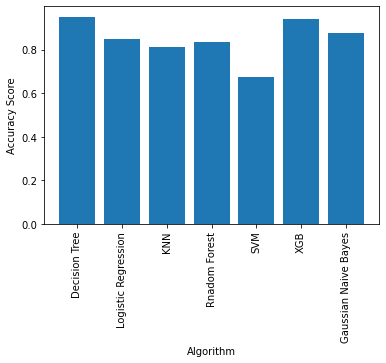

In [242]:
#1. scoring ------> roc_auc
#plotting graph of models vs accuracy score
plt.bar(['Decision Tree','Logistic Regression','KNN','Rnadom Forest','SVM','XGB','Gaussian Naive Bayes'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_svm,ac_xgb,ac_gnv])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=90)
plt.show()

### f1_score for various models 

In [243]:
print(f"F1_SCORE:\nDecision Tree\t\t:{f1_dt}\nLogistic Regression\t:{f1_lr}\nKNN\t\t\t:{f1_knn}\nRnadom Forest\t\t:{f1_rf}\nSVM\t\t\t:{f1_svm}\nXGB\t\t\t:{f1_xgb}\nGaussian Naive Bayes\t:{f1_gnv}")

F1_SCORE:
Decision Tree		:0.932489427971284
Logistic Regression	:0.9282742517000422
KNN			:0.9288020242358209
Rnadom Forest		:0.9294676469799145
SVM			:0.9284141549424456
XGB			:0.06122448979591836
Gaussian Naive Bayes	:0.26666666666666666


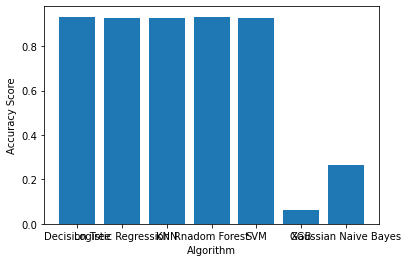

In [244]:
#1. scoring ------> f1_score
#plotting graph of models vs accuracy score
plt.bar(['Decision Tree','Logistic Regression','KNN','Rnadom Forest','SVM','XGB','Gaussian Naive Bayes'],[f1_dt,f1_lr,f1_knn,f1_rf,f1_svm,f1_xgb,f1_gnv])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.show()

#        -----------------THANK YOU------------------
